**Problem Statement:**


---


A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above.(Classification)

2.If customer is not eligible for the input required amount and duration,
what can be amount for the given duration.(Regression)


**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

**Read Dataset**

In [ ]:
# train contains training dataset using which we have to create model
# test contains testing dataset for which we have to find predictions
train = pd.read_csv("/content/training_set.csv")
test = pd.read_csv("/content/testing_set.csv")

**Dataset Checking**

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.shape

(614, 13)

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.shape

(367, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


**EDA(Exploratory data analysis)**

In [ ]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

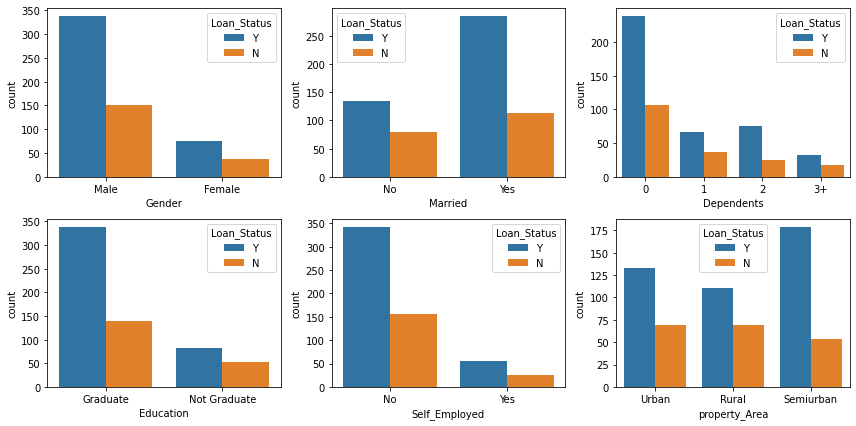

In [ ]:
countplot_list = ["Gender","Married","Dependents","Education","Self_Employed","property_Area"]
plt.figure(figsize=(12,6))
x=1
for i in countplot_list:
    plt.subplot(2,3,x)
    sb.countplot(x=i,hue='Loan_Status',data=train)
    x = x + 1
plt.tight_layout()

From above EDA, we got to learn that, high count of loan approval for:-
1. who are male
2. Who are married
3. who has no dependents
4. who are graduated   
5. who are not self employed



**Missing Data Treatment**

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

In [ ]:
train.Loan_Amount_Term.value_counts()
#It seems like most of loan term is 360 months. So we will replace missing data by 360 months


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Replacing missing data present in Loan_Amount_Term with mode value as its data type is float.
# we can not replace missing data by mean value of column as it will generate different value present in data
train['Loan_Amount_Term'] = train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0])
test['Loan_Amount_Term'] = test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0])

In [ ]:
train.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#Replacing missing numerical data by mean value and categorical missing data by mode value.
for i in train.columns:
    if train[i].dtypes == 'object':
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        x = train[i].mean()
        train[i] = train[i].fillna(x)
        
for i in test.columns:
    if test[i].dtypes == 'object':
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)
    else:
        x = test[i].mean()
        test[i] = test[i].fillna(x)

In [ ]:
print(train.isna().sum().sum(),"|",test.isna().sum().sum())

0 | 0


**Final train and test dataset with no missing data which we will further use for solving problem statement 1, 2A and 2B**

**Problem Statement 1 :- Need to check eligibility of customer for loan (Classification)**

In [ ]:
#storing train data in train_df_1 and storing test data in test_df_1 for problem statement 1:-
train_df_1 = train
test_df_1 = test

In [ ]:
train_df_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test_df_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area'],
      dtype='object')

In [ ]:
#Adding Applicant income and coapplicant income to make total income
train_df_1["TotalIncome"] = train_df_1["ApplicantIncome"] + train_df_1["CoapplicantIncome"]
test_df_1["TotalIncome"] = test_df_1["ApplicantIncome"] + test_df_1["CoapplicantIncome"]

#And then, Dropping Applicant income and coapplicant income 
train_df_1 = train_df_1.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)
test_df_1 = test_df_1.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

In [ ]:
train_df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.00000
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6913.54085
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.00000
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.00000
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.00000


In [ ]:
test_df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.000000,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.000000,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.000000,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,0.825444,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.000000,Urban,3276


**Define X & Y**

In [ ]:
#X and Y has been defined using training data
#P has been defined using testing data
Y = train_df_1[["Loan_Status"]]
X = train_df_1.drop(["Loan_Status","Loan_ID"],axis=1)
P = test_df_1.drop(["Loan_ID"],axis=1)

**Preprocessing or One hot encoding**

In [ ]:
#One hot encoding for categorical columns in X & categorical column in P
Xnew = pd.get_dummies(X)
Pnew = pd.get_dummies(P)

In [ ]:
len(Xnew.columns)

19

In [ ]:
len(Pnew.columns)
# There is no differnce of columns in Pnew compared to Xnew

19

**Division of training data in training and testing set**

In [ ]:
# now standardiszation is done on training and testing data
# now we have to use standardised training data for building model(only Xnew and Y)
# standardised testing data will be used further for predictions after building above model(Pnew to be used)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=101)

**Model 1 :- Logistic Regression**

Training Accuracy is:- 80.86 %
Testing Accuracy is:- 78.05 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           N       0.88      0.47      0.61        45
           Y       0.76      0.96      0.85        78

    accuracy                           0.78       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.78      0.76       123
 

Confusin Matrix for xtest data:-



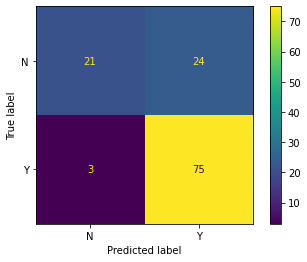

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)
lr_model = lr.fit(xtrain,ytrain)
tr_pred_lr = lr_model.predict(xtrain)
ts_pred_lr = lr_model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_lr = round(accuracy_score(ytrain,tr_pred_lr),4)
ts_acc_lr = round(accuracy_score(ytest,ts_pred_lr),4)
print("Training Accuracy is:-",round(tr_acc_lr*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_lr*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(ytest,ts_pred_lr),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(lr_model,xtest,ytest))

**Model 2:- KNN classifier**

Training Accuracy is:- 73.93 %
Testing Accuracy is:- 58.54 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           N       0.31      0.11      0.16        45
           Y       0.63      0.86      0.72        78

    accuracy                           0.59       123
   macro avg       0.47      0.49      0.44       123
weighted avg       0.51      0.59      0.52       123
 

Confusin Matrix for xtest data:-



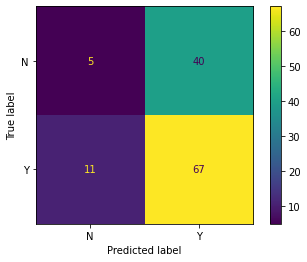

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc_model = knc.fit(xtrain,ytrain)
tr_pred_knc = knc_model.predict(xtrain)
ts_pred_knc = knc_model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_knc = round(accuracy_score(ytrain,tr_pred_knc),4)
ts_acc_knc = round(accuracy_score(ytest,ts_pred_knc),4)
print("Training Accuracy is:-",round(tr_acc_knc*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_knc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(ytest,ts_pred_knc),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(knc_model,xtest,ytest))

**Model 3:- Decision Tree Classifier**

Training Accuracy is:- 100.0 %
Testing Accuracy is:- 77.24 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           N       0.71      0.64      0.67        45
           Y       0.80      0.85      0.83        78

    accuracy                           0.77       123
   macro avg       0.76      0.75      0.75       123
weighted avg       0.77      0.77      0.77       123
 

Confusin Matrix for xtest data:-



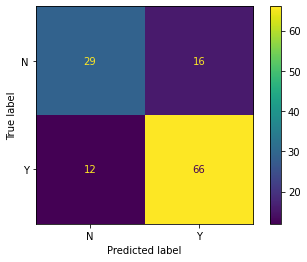

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=101)
dtc_model = dtc.fit(xtrain,ytrain)
tr_pred_dtc = dtc_model.predict(xtrain)
ts_pred_dtc = dtc_model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_dtc = round(accuracy_score(ytrain,tr_pred_dtc),4)
ts_acc_dtc = round(accuracy_score(ytest,ts_pred_dtc),4)
print("Training Accuracy is:-",round(tr_acc_dtc*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_dtc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(ytest,ts_pred_dtc),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(dtc_model,xtest,ytest))

**Model 4:- Random Forest Classifier**

Training Accuracy is:- 100.0 %
Testing Accuracy is:- 78.86 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           N       0.85      0.51      0.64        45
           Y       0.77      0.95      0.85        78

    accuracy                           0.79       123
   macro avg       0.81      0.73      0.74       123
weighted avg       0.80      0.79      0.77       123
 

Confusin Matrix for xtest data:-



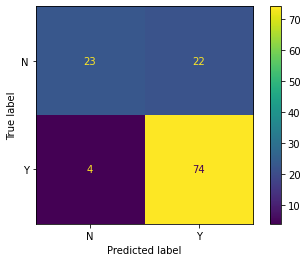

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfc_model = rfc.fit(xtrain,ytrain)
tr_pred_rfc = rfc_model.predict(xtrain)
ts_pred_rfc = rfc_model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_rfc = round(accuracy_score(ytrain,tr_pred_rfc),4)
ts_acc_rfc = round(accuracy_score(ytest,ts_pred_rfc),4)
print("Training Accuracy is:-",round(tr_acc_rfc*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_rfc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(ytest,ts_pred_rfc),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(rfc_model,xtest,ytest))

**Model Comparison - Classification**

In [ ]:
dictionary1 = {'Classification Model':["Logistic Regression","KNN Classifier",
                        "Decision Tree Classifier","Random Forest Classifier"],
             'Accuracy':[ts_acc_lr,ts_acc_knc,ts_acc_dtc,ts_acc_rfc]}

models_1 = pd.DataFrame(dictionary1)
models_1.sort_values(by=["Accuracy"])

,Classification Model,Accuracy
1,KNN Classifier,0.5854
2,Decision Tree Classifier,0.7724
0,Logistic Regression,0.7805
3,Random Forest Classifier,0.7886


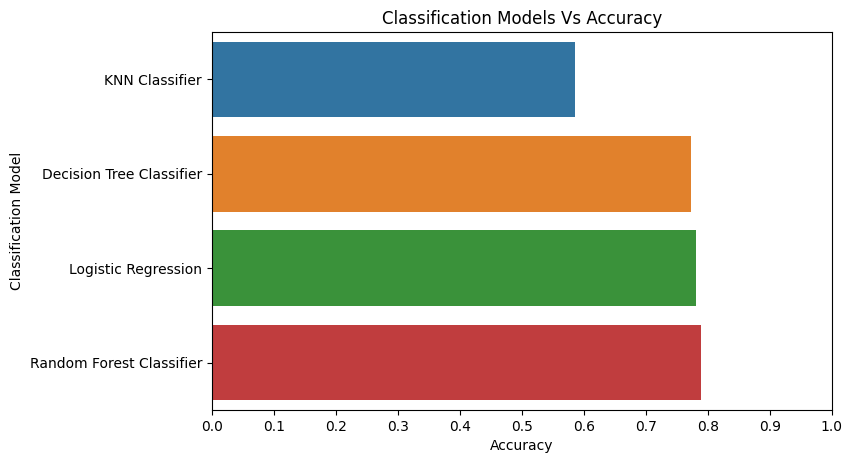

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sb.barplot(x="Accuracy",y="Classification Model",data=models_1.sort_values(by=["Accuracy"]))
plt.title("Classification Models Vs Accuracy")
plt.xticks(np.linspace(0,1,11));

**Final Model consideration will be random forest as per accuracy**

**GridSearchCV using random forest model and tuning different cv count to find best score**

In [ ]:
best_score = []

for i in range(4,11,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(random_state=101)

    tg = {'max_depth':range(2,10),
          'min_samples_split':range(2,5),
          'min_samples_leaf':range(2,6)}

    from sklearn.model_selection import GridSearchCV
    cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=i)
    cvmodel = cv.fit(Xnew,Y)
    best_score.append(round(cvmodel.best_score_,4))

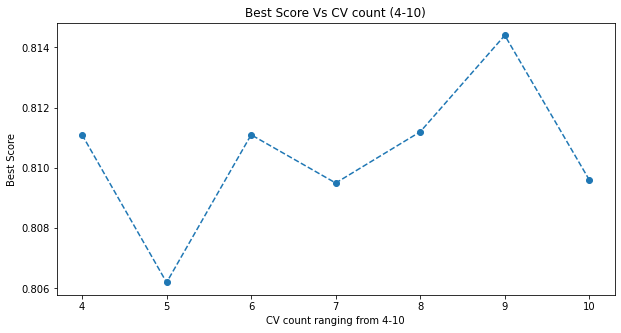

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(4,11,1),best_score,"--o")
plt.xticks(range(4,11,1))
plt.xlabel("CV count ranging from 4-10")
plt.ylabel("Best Score")
plt.title("Best Score Vs CV count (4-10)");

**Final Grid Search CV model using cv count 9 as it is having best score comparing to other validation count size also tuning different parameter**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

tg = {'max_depth':range(2,10),
     'min_samples_split':range(2,5),
     'min_samples_leaf':range(2,6)}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=9)
cvmodel = cv.fit(Xnew,Y)
round(cvmodel.best_score_,4)

0.8144

In [ ]:
# Best parameters obtained from GridSearchCV model
cvmodel.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

**Final Random Forest Classification model using above best parameter grid and passing whole training data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101,max_depth=7,min_samples_leaf=4,min_samples_split=2)
rfc_model_final = rfc.fit(Xnew,Y)

**Final Predictions**

In [ ]:
loan_status = pd.DataFrame(rfc_model_final.predict(Pnew),columns=["Loan_Status"])
submission = test_df_1.join(loan_status)[["Loan_ID","Loan_Status"]]
#submission.to_csv("submission1_w4.csv")

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


**Conclusion for problem statement:-**



1.  From above alogirithms we found out random forest classifier is best alogirithm to find accurate predictions comparing to other model.

2. Also using GridSearchCV with random forest classifier model, we are able to achieve near about 81.5% accuracy

